# AI & Security Project

**visualizing_metrics.ipynb**: in this notebook we visualize the metrics, which we obtained from evaluating our models in [implementing_defensive_techniques.ipynb](./implementing_defensive_techniques.ipynb).


In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv("./exports/evaluation_metrics.csv")
df.head()

,Model,Top-1 (No Attack),Top-5 (No Attack),Top-1 (FGSM Attack),Top-5 (FGSM Attack),Top-1 (PGD Attack),Top-5 (PGD Attack),Top-1 (CW Attack),Top-5 (CW Attack),Top-1 (Defense FGSM),Top-5 (Defense FGSM),Top-1 (Defense PGD),Top-5 (Defense PGD),Top-1 (Defense CW),Top-5 (Defense CW)
0,ResNet18,24.00,6.76,84.86,66.16,99.82,97.74,88.96,56.12,8.14,2.14,43.68,20.32,4.56,0.80
1,ResNet50,13.24,1.96,44.30,21.46,94.66,90.00,70.00,22.90,4.54,1.08,79.14,45.32,8.50,1.12
2,ResNet152,8.34,0.64,34.34,12.48,89.12,75.84,51.00,12.58,2.88,0.14,NaN,NaN,NaN,NaN
3,VGG16,21.92,5.62,89.22,73.60,99.80,98.44,91.32,64.28,99.90,99.50,99.90,99.50,99.90,99.50
4,VGG19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Visualizing Metrics

### Heatmap

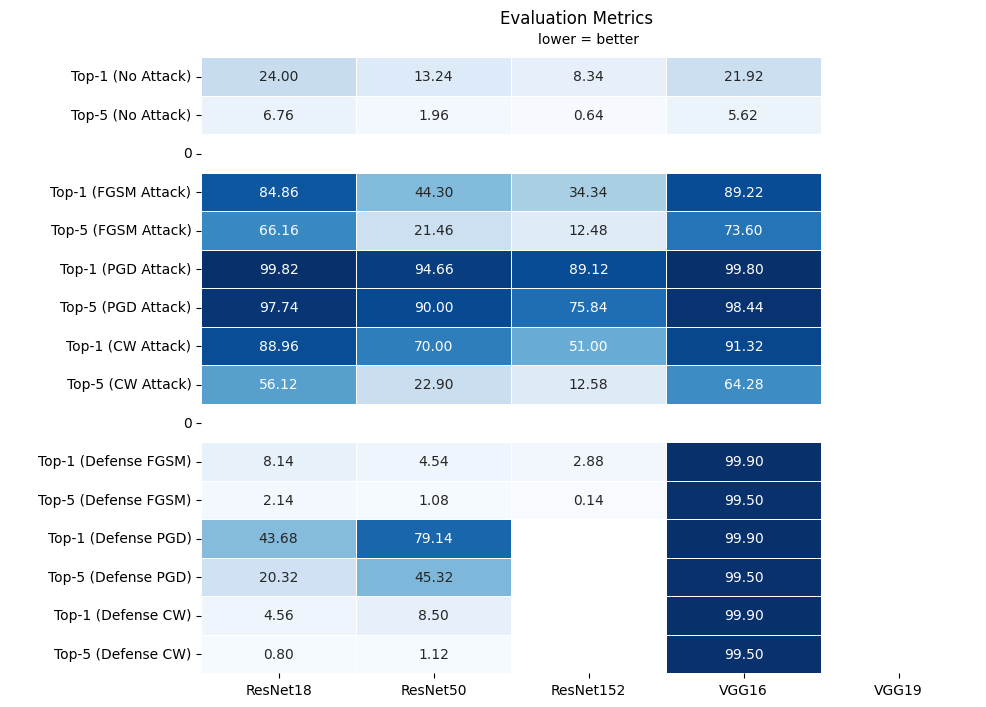

In [21]:
vis_df = df.copy()
vis_df = vis_df.set_index('Model')

# Add blank rows between sections
sections = [
    ['Top-1 (No Attack)', 'Top-5 (No Attack)'],
    ['Top-1 (FGSM Attack)', 'Top-5 (FGSM Attack)',
     'Top-1 (PGD Attack)', 'Top-5 (PGD Attack)',
     'Top-1 (CW Attack)', 'Top-5 (CW Attack)'],
    ['Top-1 (Defense FGSM)', 'Top-5 (Defense FGSM)',
     'Top-1 (Defense PGD)', 'Top-5 (Defense PGD)',
     'Top-1 (Defense CW)', 'Top-5 (Defense CW)']
]

# Rearrange rows with gaps
df_with_gaps = pd.DataFrame()
for section in sections:
    section_data = vis_df[section].T  # Transpose section for heatmap
    df_with_gaps = pd.concat([df_with_gaps, section_data])  # Add section to result
    blank_row = pd.DataFrame([[np.nan] * len(vis_df.columns)], columns=vis_df.columns)  # Create blank row
    df_with_gaps = pd.concat([df_with_gaps, blank_row])  # Append blank row

# Drop the last blank row (not needed)
df_with_gaps = df_with_gaps[:-1]

df_with_gaps = df_with_gaps[["ResNet18", "ResNet50", "ResNet152", "VGG16", "VGG19"]]

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_with_gaps, annot=True, fmt='.2f', cmap="Blues",
            vmin=0, vmax=100, cbar=False, linewidths=0.5, linecolor="white")
plt.title("lower = better", fontsize=10, y=1.01)
plt.suptitle("Evaluation Metrics", y=0.94)
plt.xlabel("")
plt.ylabel(" ", labelpad=10)
plt.show()